# Image Processing

Simple examples of image processing concepts on OpenCV. Concepts explored:

* Data structures
* Color and color conversions
* Thresholding
* Blurring
* Edges

In [2]:
import matplotlib, cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Basic data structures in OpenCV

In [3]:
# read an image
img = cv2.imread('../data/opencv_numpy/lena.jpg')

# show image format (basically a 3-d array of pixel color info, in BGR format)
print(img)

[[[127 136 226]
  [126 135 225]
  [126 135 225]
  ..., 
  [123 151 235]
  [106 135 216]
  [ 81 110 191]]

 [[127 136 226]
  [127 136 226]
  [127 136 226]
  ..., 
  [120 144 228]
  [102 126 208]
  [ 78 102 184]]

 [[128 137 227]
  [128 137 227]
  [125 136 226]
  ..., 
  [127 144 230]
  [110 128 211]
  [ 88 106 189]]

 ..., 
 [[ 55  19  89]
  [ 57  21  91]
  [ 60  25  92]
  ..., 
  [ 82  68 173]
  [ 83  68 176]
  [ 81  68 176]]

 [[ 56  20  90]
  [ 58  22  92]
  [ 61  26  93]
  ..., 
  [ 85  71 176]
  [ 84  71 179]
  [ 84  73 183]]

 [[ 57  21  91]
  [ 59  23  93]
  [ 62  27  94]
  ..., 
  [ 82  70 176]
  [ 84  71 179]
  [ 84  73 183]]]


### Colors and color conversions

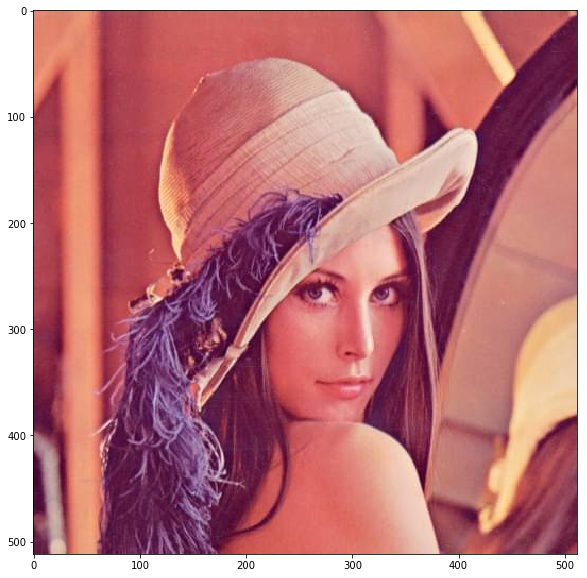

In [4]:
# convert image to RGB color for matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# show image with matplotlib
plt.figure(figsize=(10,10))
plt.imshow(img)

In [6]:
# convert image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# grayscale image represented as a 2-d array
print(gray_img)

[[162 161 161 ..., 173 156 131]
 [162 162 162 ..., 166 148 124]
 [163 163 162 ..., 168 151 129]
 ..., 
 [ 44  46  49 ..., 101 102 102]
 [ 45  47  50 ..., 104 105 107]
 [ 46  48  51 ..., 103 105 107]]


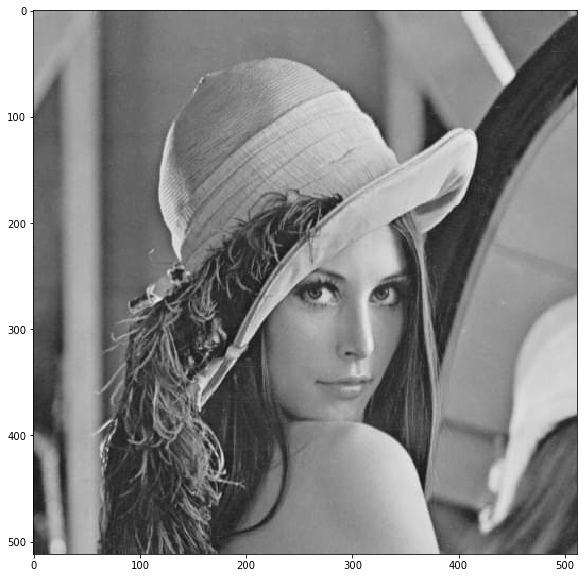

In [7]:
# have to convert grayscale back to RGB for plt.imshow()
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB))

### Finding the average color of an image

In [8]:
# find average per row
# np.average() takes in an axis argument which finds the average across that axis. 
average_color_per_row = np.average(img, axis=0)

# find average across average per row
average_color = np.average(average_color_per_row, axis=0)

# convert back to uint8
average_color = np.uint8(average_color)
print(average_color)

[180  99 105]


In [9]:
# create 100 x 100 pixel array with average color value
average_color_img = np.array([[average_color]*100]*100, np.uint8)
#plt.figure(figsize=(10,10))
#plt.imshow(average_color_img)

---

## Binary thresholding

Examples using thresholding on brightness/darkness of grayscale image and on color ranges


### Binary thresholding on grayscale image

In [10]:
# threshold for grayscale image
_, threshold_img = cv2.threshold(gray_img, 60, 255, cv2.THRESH_BINARY)

#threshold_img = cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB)
#plt.figure(figsize=(10,10))
#plt.imshow(threshold_img)

---

## Gaussian Blur

Gaussian blurring in action, and how it makes a difference in the binary image that it produces

In [11]:
img = cv2.imread('../data/opencv_numpy/lena.jpg')
#plt.figure(figsize=(10,10))
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [12]:
# preproccess with blurring, with 5x5 kernel
img_blur_small = cv2.GaussianBlur(img, (5,5), 0)
#plt.figure(figsize=(10,10))
#plt.imshow(cv2.cvtColor(img_blur_small, cv2.COLOR_BGR2RGB))

In [14]:
img_blur_large = cv2.GaussianBlur(img, (15,15), 0)
#plt.figure(figsize=(10,10))
#plt.imshow(cv2.cvtColor(img_blur_large, cv2.COLOR_BGR2RGB))

In [15]:
# threshold on regular image
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, threshold_img = cv2.threshold(gray_img, 100, 255, cv2.THRESH_BINARY)
#plt.figure(figsize=(10,10))
#plt.imshow(cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB))

In [16]:
#threshold on blurred image
gray_blur_img = cv2.cvtColor(img_blur_small, cv2.COLOR_BGR2GRAY)
_, threshold_img_blur = cv2.threshold(gray_blur_img, 100, 255, cv2.THRESH_BINARY)
#plt.figure(figsize=(10,10))
#plt.imshow(cv2.cvtColor(threshold_img_blur, cv2.COLOR_GRAY2RGB))

## Edge detection
Edges are points where there is a boundary (or an edge) between two image regions. In general, an edge can be of almost arbitrary shape, and may include junctions. In practice, edges are usually defined as sets of points in the image which have a strong gradient magnitude.

Lets try to detect edges using Canny edge detector.

In [17]:
img = cv2.imread('../data/opencv_numpy/lena.jpg')
#plt.figure(figsize=(10,10))
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [18]:
# preprocess by blurring and grayscale
img_preprocessed  = cv2.cvtColor(cv2.GaussianBlur(img, (7,7), 0), cv2.COLOR_BGR2GRAY)

In [19]:
# find binary image with edges
img_edges = cv2.Canny(img_preprocessed, threshold1=90, threshold2=110)
#plt.figure(figsize=(10,10))
#plt.imshow(cv2.cvtColor(img_edges, cv2.COLOR_GRAY2RGB))

# Feature Detection
we are looking for specific patterns or specific features which are unique, which can be easily tracked, which can be easily compared

In [20]:
img = cv2.imread('../data/opencv_numpy/a1.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
#plt.figure(figsize=(10,10))
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Harris corner detector is not good enough when scale of image changes.


Now let's try to find the interseting 2d features using ORB feature detector

In [21]:
img = cv2.imread('../data/opencv_numpy/a1.jpg',0)

# Initiate STAR detector
orb = cv2.ORB_create()

# find the keypoints with ORB
kp = orb.detect(img,None)

# compute the descriptors with ORB
kp, des = orb.compute(img, kp)

# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img,kp,None,color=(0,255,0), flags=0)
#plt.figure(figsize=(10,10))
#plt.imshow(img2)

# Feature detection and matching
We need to estimate a projective transformation that relates these images together. The steps will be
1. Define one image as a target or destination image, which will remain anchored while the others are warped
2. Detect features in all three images
3. Match features from left and right images against the features in the center, anchored image.

We detect "Oriented FAST and rotated BRIEF" (ORB) features in both images and apply the ratio test to find the best matches.

In [22]:
img1 = cv2.imread('../data/opencv_numpy/box.png',0)          # queryImage
img2 = cv2.imread('../data/opencv_numpy/box_in_scene.png',0) # trainImage

MIN_MATCH_COUNT = 10

# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING)

# Match descriptors.
matches = bf.knnMatch(des1,des2,k=2)

Find good matches using lowe's ratio

In [23]:
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,flags=2)
#plt.figure(figsize=(10,10))
#plt.imshow(img3)

Now we set a condition that atleast 10 matches (defined by MIN_MATCH_COUNT) are to be there to find the object. Otherwise simply show a message saying not enough matches are present.

If enough matches are found, we extract the locations of matched keypoints in both the images. They are passed to find the perpective transformation. Once we get this 3x3 transformation matrix, we use it to transform the corners of queryImage to corresponding points in trainImage. Then we draw it.

In [24]:
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0) #find homography
    matchesMask = mask.ravel().tolist()

    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

Finally we draw our inliers (if successfully found the object) or matching keypoints (if failed).

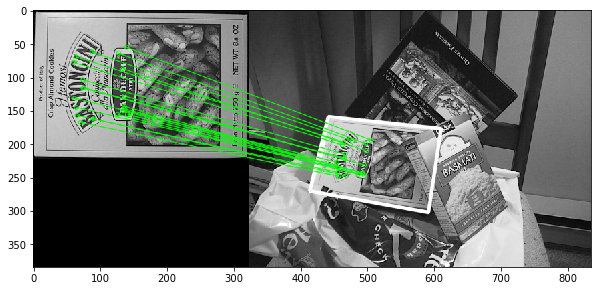

In [25]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.figure(figsize=(10,10))
plt.imshow(img3, 'gray')

See the result below. Object is marked in white color in cluttered image:

In [26]:
print('The end!')

The end!
